In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from matplotlib import ticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from numbers_parser import Document
from os import path as path
import collections

import Dumbleplot as dp

#### Read datafile

In [2]:
# Give path to file and filename:
pathtofile = "/Users/scibook/Eigen/PhD/Experiments/LLPS/20240206 ANS-PEG interaction/Analysis"
filename = "fluorescence.numbers"


# Give information how your data is organised:
how_many_datasets_to_display = 1
data_organised_in_rows_or_columns = "rows"


# Give information where to find your data:
get_data_from_sheet_nr = 0
talbe_nr = 0  # only relevant for .numbers-files

first_cell = 2, "name"  # row, column
last_cell = 3, "t12"

In [3]:
spellbook = dp.DataImport(pathtofile, filename)
spellbook.import_data(get_data_from_sheet_nr, 0)
n = 0
print("Control:")
spellbook.df

Control:


,name,t2,t3,t4,t5,t6,t7,t8,t10,t12
0,h:mm,2024-02-07 15:24:00+00:00,2024-02-07 15:53:00+00:00,2024-02-07 16:22:00+00:00,2024-02-07 16:26:00+00:00,2024-02-07 16:29:00+00:00,2024-02-07 16:44:00+00:00,2024-02-07 17:03:00+00:00,2024-02-07 17:36:00+00:00,2024-02-07 18:01:00+00:00
1,delta,None,29 minutes,58 minutes,1 hour 2 minutes,1 hour 5 minutes,1 hour 20 minutes,1 hour 39 minutes,2 hours 12 minutes,2 hours 37 minutes
2,min,0.0,29.0,58.0,62.0,65.0,80.0,99.0,122.0,157.0
3,6% Ammonium sulfate | 12% PEG,1.0,1.106631,1.333988,1.333988,1.333988,1.376193,1.447153,1.661884,1.931902


In [4]:
spells = dp.Data(how_many_datasets_to_display, data_organised_in_rows_or_columns) 
spells.get_data(spellbook.df, first_cell, last_cell)
print("Control:")
spells.data_table

Control:


,name,t2,t3,t4,t5,t6,t7,t8,t10,t12
2,min,0.0,29.0,58.0,62.0,65.0,80.0,99.0,122.0,157.0
3,6% Ammonium sulfate | 12% PEG,1.0,1.106631,1.333988,1.333988,1.333988,1.376193,1.447153,1.661884,1.931902


In [6]:
spells.make_dict()
spells.get_xdata()
spells.delete_nans()

#### specify plot properties of each dataset

In [7]:
# copy for each dataset you want to display

spells.ydata[n]["marker"] = "o"
spells.ydata[n]["linestyle"] = "solid"
spells.ydata[n]["color"] = None  # "None" for default colors, alternative: hexcolors or names (hence "green")

n += 1  # do not change

#### Plot

In [8]:
# specify the properties of the general plot
plot_properties = {
    "figname" : "fluorescence fold droplet 11",
    "formats" : ["svg", "png"],  # "svg", "png", "jpeg", "bmp"
    "xlabel" : "time [min]",
    "ylabel" : "fluorescence fold [AU]",
    "x-range" : [None, None],  # [None, None] for default, otherwise [startvalue, endvalue]
    "y-range" : [None, None],  
    "x-ticks" : 5,  # specify number of labeld major ticks on each axis, None is automode
    "y-ticks" : None,  
    "x-minor" : 2,  # specify number of minor ticks between major ticks, 2 or 5 is best, None is automode
    "y-minor" : 2
}

In [9]:
hp = dp.Plotter(plot_properties)
hp.set_limits()
hp.set_major_ticks()

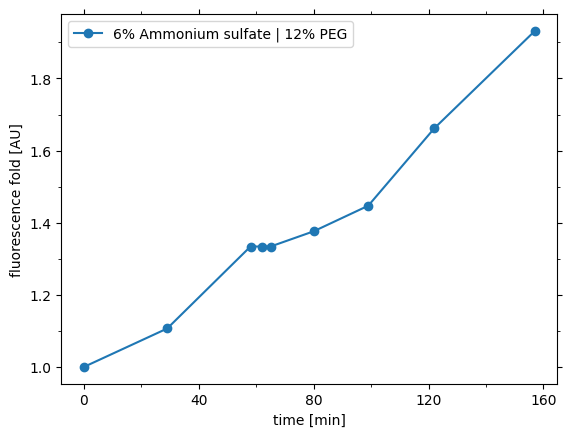

In [10]:
# main plot; all in one
fig = plt.figure()
ax = fig.add_subplot(111)

for data in spells.ydata:
    dataset = spells.ydata[data]
    ax.plot(dataset["xdata"], dataset["data"],
            marker = dataset["marker"], linestyle = dataset["linestyle"], color = dataset["color"], label = dataset["name"])

ax.set_xlabel(hp.pp["xlabel"])
ax.set_ylabel(hp.pp["ylabel"])
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
if hp.pp["xtick_number"] is not None:
    ax.xaxis.set_major_locator(hp.pp["xtick_number"])
if hp.pp["ytick_number"] is not None:
    ax.yaxis.set_major_locator(hp.pp["ytick_number"])
if hp.pp["x-minor"] is not None:
    ax.xaxis.set_minor_locator(AutoMinorLocator(hp.pp["x-minor"]))
if hp.pp["y-minor"] is not None:
    ax.yaxis.set_minor_locator(AutoMinorLocator(hp.pp["y-minor"]))

ax.legend()

#### Save figure

In [ ]:
savepath = path.join(pathtofile, plot_properties["figname"])
for file_format in plot_properties["formats"]:
    fig.savefig(savepath + '.%s' % file_format, dpi=600, format=file_format)

In [ ]:
# secondary plot, indivual datasets